# Clustering

In [129]:
## for data
import numpy as np
import pandas as pd

## for plotting
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.patches as mpatches

## for geospatial
import folium
import geopy

## for machine learning
from scipy.stats import gaussian_kde,zscore,chi2,f_oneway
from sklearn import preprocessing, cluster
from factor_analyzer import FactorAnalyzer
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
from factor_analyzer import FactorAnalyzer
from sklearn_extra.cluster import KMedoids
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
import scipy
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree
from scipy.cluster.hierarchy import dendrogram, linkage, cophenet
from scipy.spatial.distance import pdist

import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [154]:
df = pd.read_excel(r"C:\Users\hp\Downloads\Clustering Makan Siang (1).xlsx")
df.columns.tolist()

['Provinsi',
 'Imunisasi',
 'Penolong Persalinan Oleh Tenaga',
 'KB Modern',
 'ASI Eksklusif',
 'MP ASI',
 'Air Minum Layak',
 'Sanitasi Layak',
 'Ketidakcukupan Konsumsi Pangan',
 'PAUD',
 'Kepemilikan JKN/jamkesda',
 'Penerima KPS/KKS atau bantuan pangan']

In [155]:
df

,Provinsi,Imunisasi,Penolong Persalinan Oleh Tenaga,KB Modern,ASI Eksklusif,MP ASI,Air Minum Layak,Sanitasi Layak,Ketidakcukupan Konsumsi Pangan,PAUD,Kepemilikan JKN/jamkesda,Penerima KPS/KKS atau bantuan pangan
0,Aceh,25.0,92.4,53.4,82.4,95.9,89.7,77.5,81.7,34.2,97.0,48.4
1,Sumatera Utara,47.2,87.8,52.0,71.5,78.4,92.1,82.3,85.5,25.6,56.3,33.6
2,Sumatera Barat,43.6,95.6,55.4,92.9,92.8,85.2,69.3,87.8,31.2,69.7,39.5
3,Riau,49.4,86.5,58.6,86.9,89.9,90.1,84.1,74.8,25.1,63.3,26.7
4,Jambi,59.9,80.9,78.9,90.9,89.7,79.2,79.5,79.8,34.7,54.0,23.2
5,Sumatera Selatan,59.5,84.9,76.0,88.1,89.8,86.3,78.6,87.7,27.9,58.9,35.2
6,Bengkulu,79.9,91.3,76.6,84.8,95.1,73.1,79.6,80.6,29.7,63.2,44.7
7,Lampung,84.4,91.9,80.9,96.0,86.8,81.6,83.7,75.6,34.1,63.3,47.7
8,Kep. Bangka Belitung,82.4,96.0,75.2,78.5,68.4,81.0,91.6,74.7,35.7,70.0,18.6
9,Kepulauan Riau,77.8,95.7,47.3,78.0,86.6,91.8,87.7,81.2,31.8,69.3,21.8


In [156]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33 entries, 0 to 32
Data columns (total 12 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Provinsi                              33 non-null     object 
 1   Imunisasi                             33 non-null     float64
 2   Penolong Persalinan Oleh Tenaga       33 non-null     float64
 3   KB Modern                             33 non-null     float64
 4   ASI Eksklusif                         33 non-null     float64
 5   MP ASI                                33 non-null     float64
 6   Air Minum Layak                       33 non-null     float64
 7   Sanitasi Layak                        33 non-null     float64
 8   Ketidakcukupan Konsumsi Pangan        33 non-null     float64
 9   PAUD                                  33 non-null     float64
 10  Kepemilikan JKN/jamkesda              33 non-null     float64
 11  Penerima KPS/KKS atau

In [157]:
import pandas as pd

# Assuming 'df' is your DataFrame
df.fillna(0, inplace=True)

# Perform the operations
result_df = pd.DataFrame({
    "type": df.dtypes.values,
    "null": df.isnull().sum().values,
    "null_percentage": ["{:.2f}%".format(val) for val in df.isnull().sum().values / len(df) * 100],
    "unique": [df[i].nunique() for i in df.columns],
    "duplicated": df.duplicated().sum(),
    "sample": [list(pd.Series(df[i].unique()).sample())[0] for i in df.columns]
}).set_index(df.isnull().sum().index).sort_values("null", ascending=False)
result_df

,type,null,null_percentage,unique,duplicated,sample
Provinsi,object,0,0.00%,33,0,Maluku Utara
Imunisasi,float64,0,0.00%,32,0,76.1
Penolong Persalinan Oleh Tenaga,float64,0,0.00%,32,0,85.8
KB Modern,float64,0,0.00%,33,0,75.1
ASI Eksklusif,float64,0,0.00%,32,0,98.4
MP ASI,float64,0,0.00%,32,0,80.2
Air Minum Layak,float64,0,0.00%,31,0,85.2
Sanitasi Layak,float64,0,0.00%,33,0,75.0
Ketidakcukupan Konsumsi Pangan,float64,0,0.00%,33,0,96.3
PAUD,float64,0,0.00%,31,0,34.7


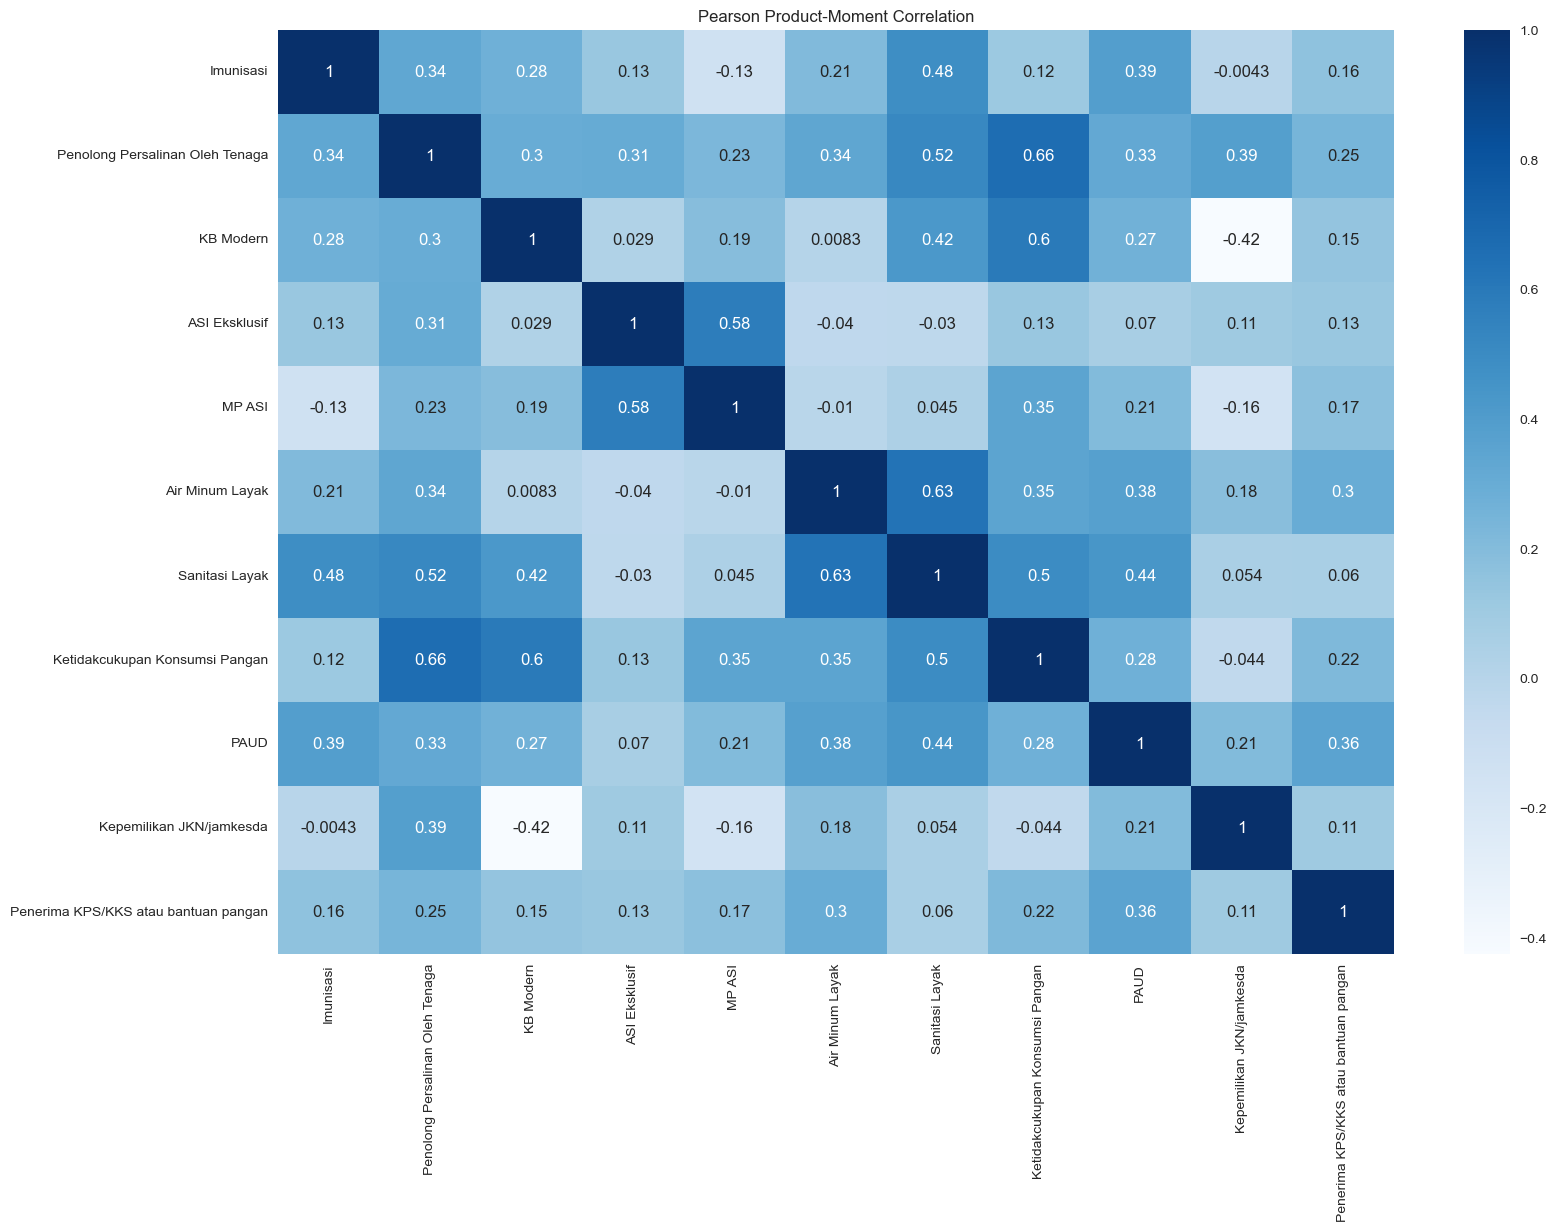

In [158]:
# Heatmap
plt.figure(figsize=(18,12))
sns.heatmap(df.corr(), annot=True, cmap='Blues')
plt.xticks(rotation=90)
plt.title("Pearson Product-Moment Correlation")
plt.show()

In [159]:
df.corr()

,Imunisasi,Penolong Persalinan Oleh Tenaga,KB Modern,ASI Eksklusif,MP ASI,Air Minum Layak,Sanitasi Layak,Ketidakcukupan Konsumsi Pangan,PAUD,Kepemilikan JKN/jamkesda,Penerima KPS/KKS atau bantuan pangan
Imunisasi,1.000000,0.336094,0.275013,0.130960,-0.131996,0.214369,0.483901,0.120422,0.388960,-0.004333,0.164464
Penolong Persalinan Oleh Tenaga,0.336094,1.000000,0.304129,0.307013,0.226870,0.340250,0.517258,0.662881,0.326578,0.385329,0.247032
KB Modern,0.275013,0.304129,1.000000,0.029166,0.192129,0.008288,0.423393,0.598348,0.270210,-0.424683,0.146417
ASI Eksklusif,0.130960,0.307013,0.029166,1.000000,0.578676,-0.040220,-0.029572,0.130543,0.069562,0.108509,0.130965
MP ASI,-0.131996,0.226870,0.192129,0.578676,1.000000,-0.010496,0.044825,0.349430,0.206083,-0.157280,0.173871
Air Minum Layak,0.214369,0.340250,0.008288,-0.040220,-0.010496,1.000000,0.631517,0.350451,0.380486,0.184792,0.300299
Sanitasi Layak,0.483901,0.517258,0.423393,-0.029572,0.044825,0.631517,1.000000,0.498242,0.440911,0.053983,0.059708
Ketidakcukupan Konsumsi Pangan,0.120422,0.662881,0.598348,0.130543,0.349430,0.350451,0.498242,1.000000,0.275386,-0.043651,0.217631
PAUD,0.388960,0.326578,0.270210,0.069562,0.206083,0.380486,0.440911,0.275386,1.000000,0.209026,0.356098
Kepemilikan JKN/jamkesda,-0.004333,0.385329,-0.424683,0.108509,-0.157280,0.184792,0.053983,-0.043651,0.209026,1.000000,0.105190


In [160]:
# Mengatur kolom 'Provinsi' sebagai index
df.set_index('Provinsi', inplace=True)

# VIF

In [161]:
# Menambahkan kolom konstanta untuk model OLS
X = sm.add_constant(df)

vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif_data

,feature,VIF
0,const,489.365667
1,Imunisasi,2.080838
2,Penolong Persalinan Oleh Tenaga,3.559214
3,KB Modern,3.305596
4,ASI Eksklusif,2.077949
5,MP ASI,2.584091
6,Air Minum Layak,2.821344
7,Sanitasi Layak,3.767413
8,Ketidakcukupan Konsumsi Pangan,3.573147
9,PAUD,1.939831


Dari output di atas diketahui bahwa nilai VIF pada setiap variabel kurang dari 10, sehingga uji asumsi multikolinearitas terpenuhi. Multikolinearitas adalah hubungan linear yang ada di antara variabel independen. Jika nilai VIF melebihi angka 10 maka dapat disimpulkan ada multikolinearitas.

# KMO dan Barlett

In [162]:
from factor_analyzer import FactorAnalyzer,calculate_kmo,calculate_bartlett_sphericity
print(f"KMO\t\t: {calculate_kmo(df)[-1]}")
print(f"Bartlett\t: {calculate_bartlett_sphericity(df)[-1]}")

KMO		: 0.5122996226212005
Bartlett	: 4.2362402178564895e-10


Untuk mengetahui apakah sampel yang digunakan mewakili populasi, dapat dilihat dari nilai Kaisen Meyer Olkin (KMO). Dari hasil output di atas dapat dilihat bahwa nilai KMO lebih dari 0,05 sehingga asumsi kecukupan data terpenuhi yaitu data cukup untuk dilakukan analisis cluster. Dari hasil output di atas diketahui bahwa p-value kurang dari 0,05 sehingga asumsi uji barlett terpenuhi.

In [163]:
df.describe()

,Imunisasi,Penolong Persalinan Oleh Tenaga,KB Modern,ASI Eksklusif,MP ASI,Air Minum Layak,Sanitasi Layak,Ketidakcukupan Konsumsi Pangan,PAUD,Kepemilikan JKN/jamkesda,Penerima KPS/KKS atau bantuan pangan
count,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000
mean,68.269697,87.072727,62.303030,86.481818,84.103030,87.387879,81.015152,77.193939,36.421212,70.369697,35.972727
std,14.564093,10.921575,14.299858,9.204871,8.997655,7.828664,9.981017,14.083855,10.722050,10.448699,14.882483
min,25.000000,48.200000,19.700000,67.000000,66.900000,65.400000,40.300000,39.700000,14.100000,54.000000,10.300000
25%,59.500000,85.200000,53.600000,78.900000,78.400000,81.600000,77.400000,73.000000,30.700000,63.200000,25.000000
50%,74.900000,88.600000,60.700000,86.900000,83.500000,89.700000,82.200000,80.100000,34.200000,69.700000,33.600000
75%,79.700000,95.600000,75.100000,94.800000,90.400000,93.000000,85.100000,87.100000,41.400000,78.100000,47.700000
max,91.400000,98.700000,84.100000,99.600000,100.000000,98.400000,97.100000,96.300000,72.000000,97.000000,70.600000


# Preprocessing

In [164]:
# Transformasi data menggunakan zscore
df_t = df.copy().apply(zscore,ddof=1)
df_t.head()

,Imunisasi,Penolong Persalinan Oleh Tenaga,KB Modern,ASI Eksklusif,MP ASI,Air Minum Layak,Sanitasi Layak,Ketidakcukupan Konsumsi Pangan,PAUD,Kepemilikan JKN/jamkesda,Penerima KPS/KKS atau bantuan pangan
Provinsi,,,,,,,,,,,
Aceh,-2.970985,0.487775,-0.622596,-0.443441,1.311116,0.295340,-0.352184,0.319945,-0.207163,2.548672,0.835027
Sumatera Utara,-1.446688,0.066590,-0.720499,-1.627597,-0.633835,0.601906,0.128729,0.589758,-1.009248,-1.346550,-0.159431
Sumatera Barat,-1.693871,0.780773,-0.482734,0.697259,0.966582,-0.279470,-1.173743,0.753065,-0.486960,-0.064094,0.237008
Riau,-1.295631,-0.052440,-0.258956,0.045430,0.644276,0.346435,0.309072,-0.169978,-1.055881,-0.676610,-0.623063
Jambi,-0.574680,-0.565187,1.160639,0.479983,0.622048,-1.045885,-0.151803,0.185039,-0.160530,-1.566673,-0.858239


# Hierarchical Clustering

# Single Linkage

Metode Single Linkage adalah proses clustering yang didasarkan pada jarak terdekat antar objeknya. Jika dua objek terpisah oleh jarak pendek, maka kedua objek tersebut akan bergabung menjadi satu cluster dan demikian seterusnya. 

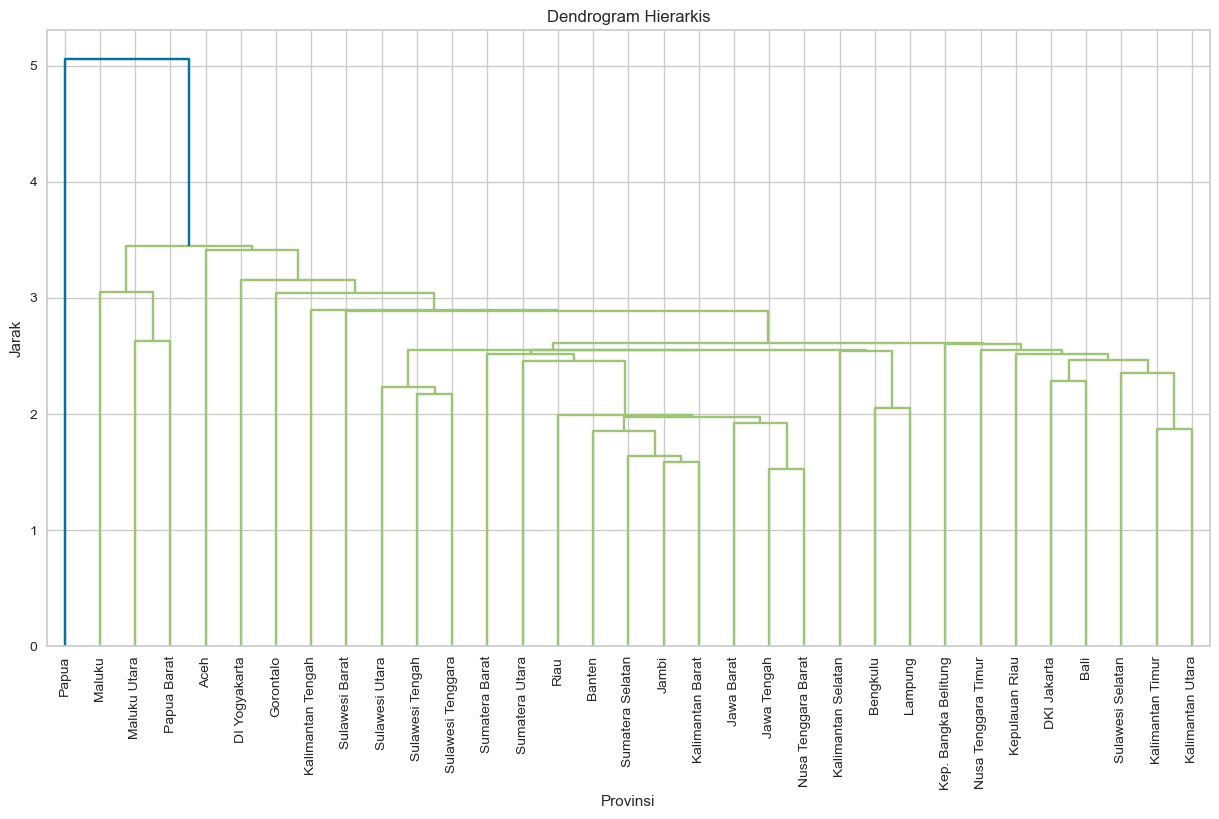

In [165]:
# Mengambil nama-nama provinsi dari indeks
provinsi = df_t.index.tolist()

# Single linkage
mergings = linkage(df_t, method="single", metric='euclidean')

# Plot dendrogram
plt.figure(figsize=(15, 8))
dendrogram(mergings, labels=provinsi, leaf_rotation=90, leaf_font_size=10)
plt.xlabel('Provinsi')
plt.ylabel('Jarak')
plt.title('Dendrogram Hierarkis')
plt.axhline(y=50, color='r', linestyle='--')  # Contoh pemotongan pada jarak 50
plt.show()

# Complete Linkage
Pengukuran jarak pada metode complete linkage dilakukan berdasarkan jarak maksimum atau terjauh.

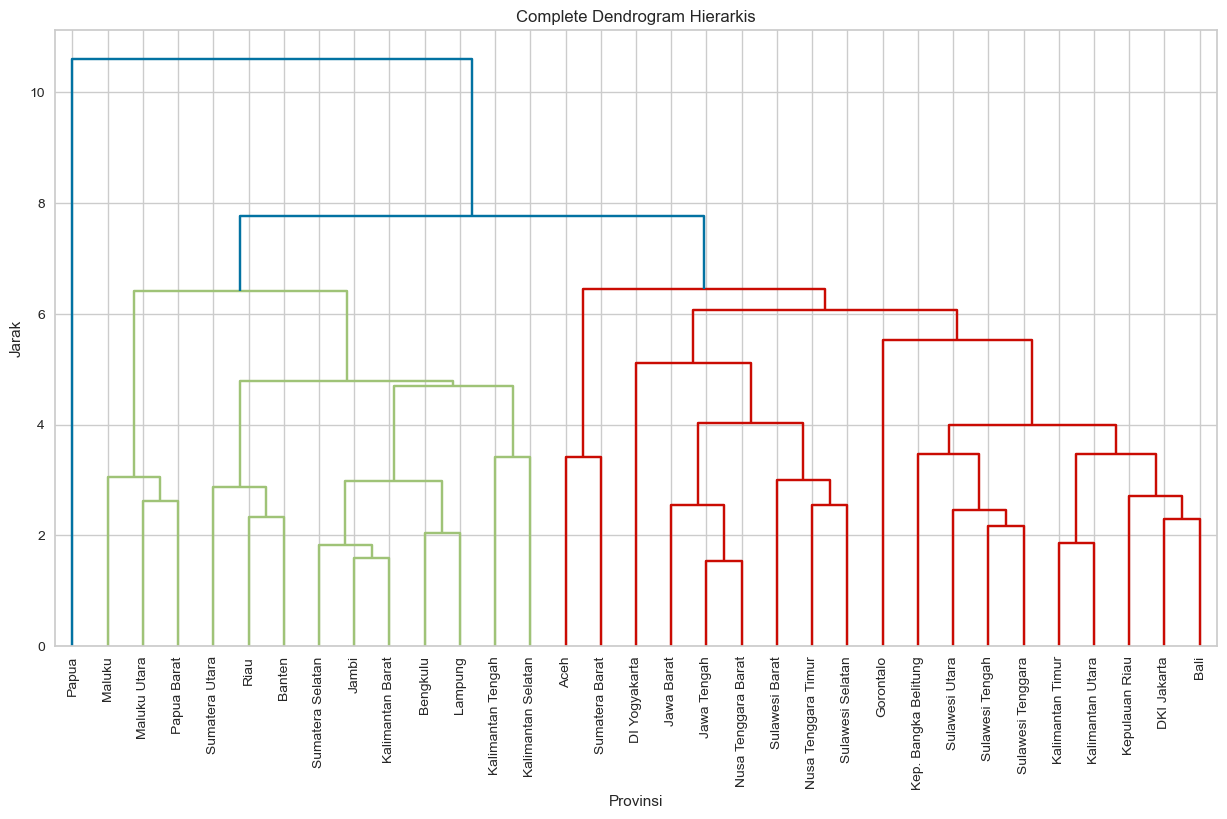

In [166]:
# Mengambil nama-nama provinsi dari indeks
provinsi = df_t.index.tolist()

# Single linkage
mergings = linkage(df_t, method="complete", metric='euclidean')

# Plot dendrogram
plt.figure(figsize=(15, 8))
dendrogram(mergings, labels=provinsi, leaf_rotation=90, leaf_font_size=10)
plt.xlabel('Provinsi')
plt.ylabel('Jarak')
plt.title('Complete Dendrogram Hierarkis')
plt.axhline(y=50, color='r', linestyle='--')  # Contoh pemotongan pada jarak 50
plt.show()

# Average Linkage

Kriteria yang digunakan dalam mengukur jarak pada metode ini adalah rata-rata jarak seluruh individu dalam satu kelompok dengan jarak seluruh individu dalam kelompok lain.

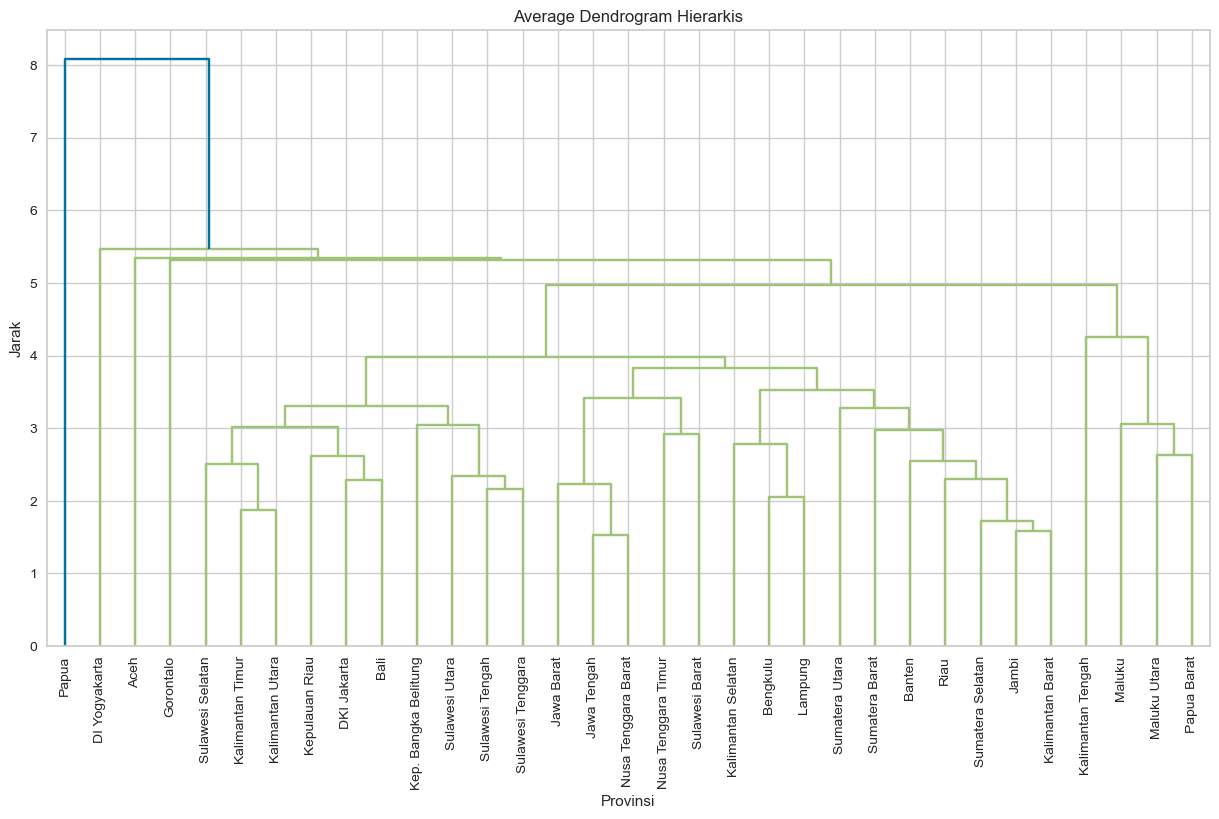

In [167]:
# Mengambil nama-nama provinsi dari indeks
provinsi = df_t.index.tolist()

# average linkage
mergings = linkage(df_t, method="average", metric='euclidean')

# Plot dendrogram
plt.figure(figsize=(15, 8))
dendrogram(mergings, labels=provinsi, leaf_rotation=90, leaf_font_size=10)
plt.xlabel('Provinsi')
plt.ylabel('Jarak')
plt.title('Average Dendrogram Hierarkis')
plt.axhline(y=50, color='r', linestyle='--')  # Contoh pemotongan pada jarak 50
plt.show()

In [168]:
# Menghitung nilai korelasi Cophenetic untuk setiap metode
methods = ["Single Linkage", "Complete Linkage", "Average Linkage"]
mergings = [linkage(df_t, method="single", metric='euclidean'),
            linkage(df_t, method="complete", metric='euclidean'),
            linkage(df_t, method="average", metric='euclidean')]
cophenetic_values = [cophenet(merging, pdist(df_t))[0] for merging in mergings]

# Membuat dataframe untuk tabel
data = {"Metode": methods, "Nilai Korelasi Cophenetic": cophenetic_values}
df_cophenetic = pd.DataFrame(data)
df_cophenetic

,Metode,Nilai Korelasi Cophenetic
0,Single Linkage,0.810433
1,Complete Linkage,0.655021
2,Average Linkage,0.852348


In [169]:
from sklearn.cluster import AgglomerativeClustering
from sklearn import metrics

In [210]:
# Maksimum jumlah klaster yang ingin dipertimbangkan
max_clusters = 10

# Menghitung CH Index untuk setiap jumlah klaster
ch_scores = []
for n_clusters in range(2, max_clusters+1):
    clusterer = AgglomerativeClustering(n_clusters=n_clusters, linkage='average')
    cluster_labels = clusterer.fit_predict(df_t)
    ch_score = metrics.calinski_harabasz_score(df_t, cluster_labels)
    ch_scores.append(ch_score)

# Membuat dataframe untuk tabel
data = {"Jumlah Klaster": range(2, max_clusters+1), "CH Index": ch_scores}
df_ch = pd.DataFrame(data)
df_ch

,Jumlah Klaster,CH Index
0,2,6.517437
1,3,8.453406
2,4,6.298081
3,5,5.188909
4,6,10.307801
5,7,11.543248
6,8,10.558589
7,9,12.429007
8,10,12.886230


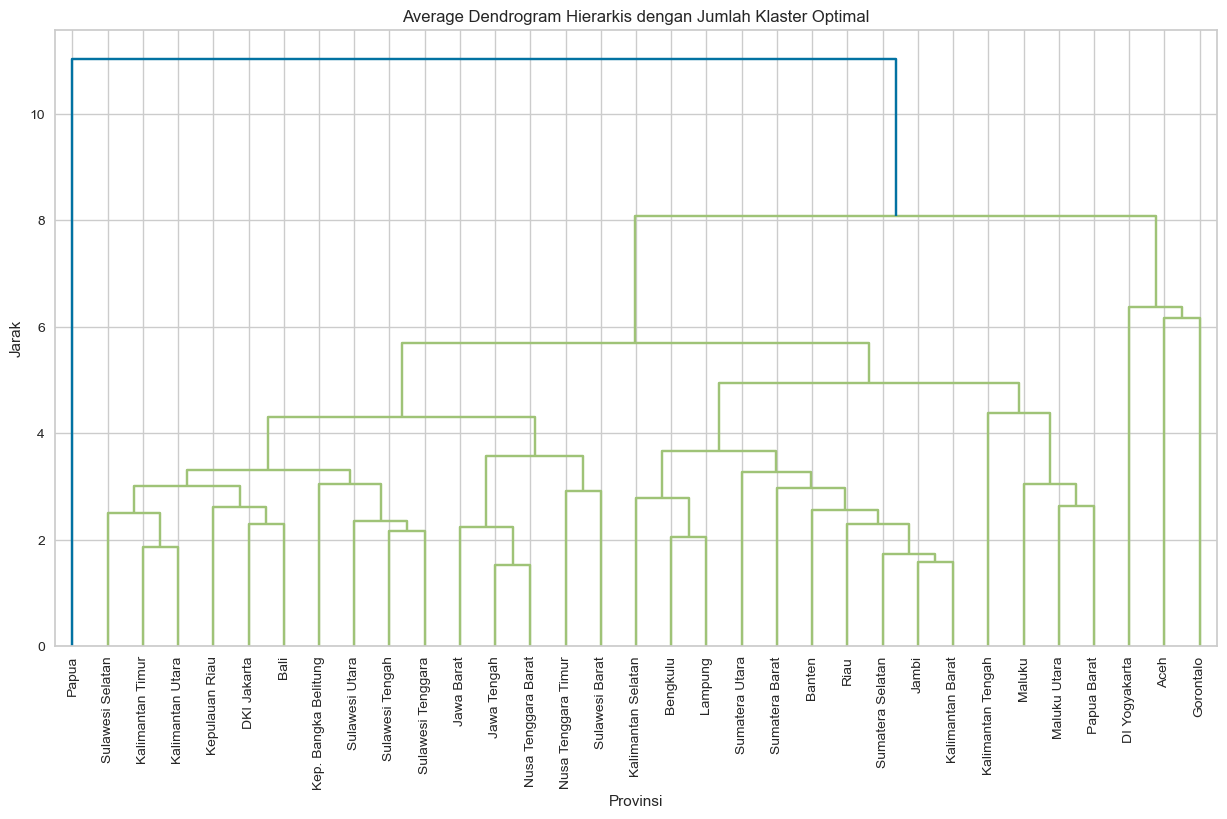

In [211]:
# Mengambil nama-nama provinsi dari indeks
provinsi = df_t.index.tolist()

# average linkage
mergings = linkage(df_t, method="average", metric='euclidean')

# Menentukan jumlah klaster optimal berdasarkan CH Index
optimal_n_clusters = 2

# Menampilkan dendrogram dengan warna klaster optimal
plt.figure(figsize=(15, 8))
dendrogram(mergings, labels=provinsi, leaf_rotation=90, leaf_font_size=10, color_threshold=mergings[-optimal_n_clusters + 1, 2])
plt.xlabel('Provinsi')
plt.ylabel('Jarak')
plt.title('Average Dendrogram Hierarkis dengan Jumlah Klaster Optimal')
plt.show()

In [212]:
import pandas as pd
from scipy.cluster.hierarchy import fcluster

# Melakukan klasterisasi hierarkis
cluster_labels = fcluster(mergings, optimal_n_clusters, criterion='maxclust')

# Menambahkan label klaster ke dalam DataFrame
df_t['Cluster'] = cluster_labels

# Menganalisis karakteristik setiap klaster
cluster_characteristics = df_t.groupby('Cluster').mean()

# Menampilkan karakteristik setiap klaster dalam bentuk tabel
cluster_characteristics

,Imunisasi,Penolong Persalinan Oleh Tenaga,KB Modern,ASI Eksklusif,MP ASI,Air Minum Layak,Sanitasi Layak,Ketidakcukupan Konsumsi Pangan,PAUD,Kepemilikan JKN/jamkesda,Penerima KPS/KKS atau bantuan pangan
Cluster,,,,,,,,,,,
1,0.036412,0.041697,0.093102,-0.021110,0.025364,0.087770,0.127477,0.083194,0.065056,-0.040766,0.053907
2,-1.165174,-1.334306,-2.979263,0.675532,-0.811659,-2.808638,-4.079259,-2.662193,-2.081805,1.304498,-1.725030


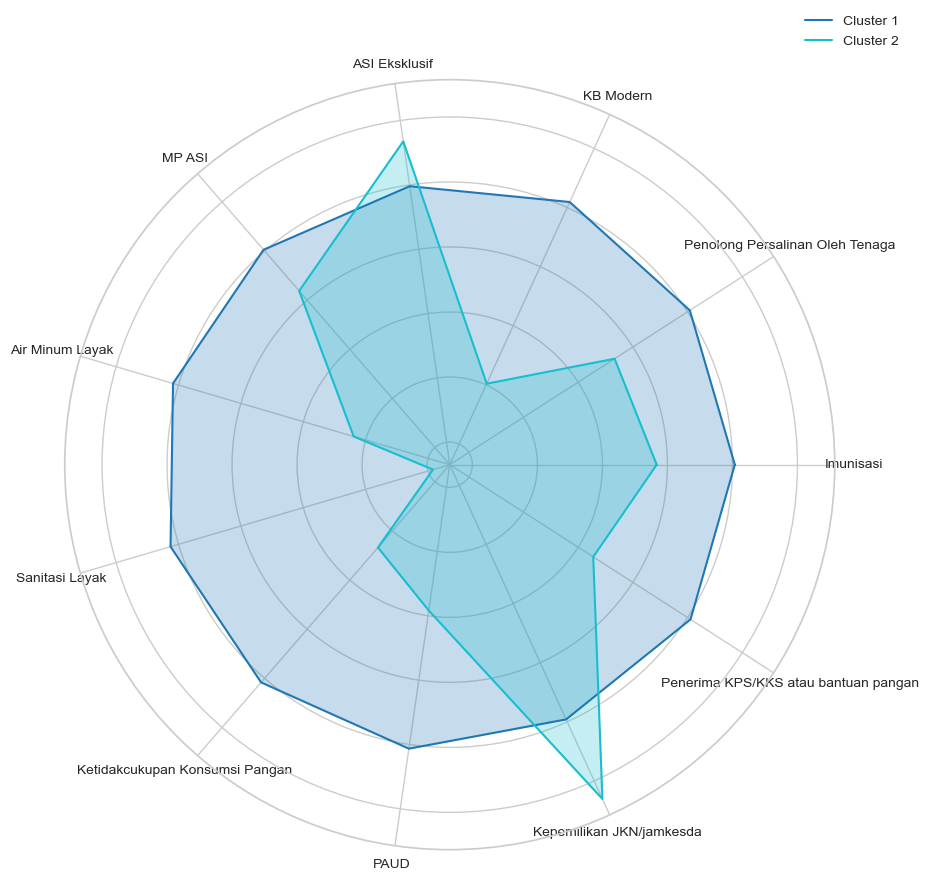

In [215]:
import matplotlib.pyplot as plt
import numpy as np

# Jumlah klaster
num_clusters = 2

# Data karakteristik klaster
cluster_data = cluster_characteristics.values

# Label untuk tiap karakteristik
labels = cluster_characteristics.columns

# Jumlah karakteristik
num_vars = len(labels)

# Mengatur sudut dan posisi label
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()

# Menambahkan titik awal untuk menggambar bentuk tertutup
cluster_data = np.concatenate((cluster_data, cluster_data[:, [0]]), axis=1)
angles += angles[:1]

# Membuat radar chart
fig, ax = plt.subplots(subplot_kw=dict(polar=True), figsize=(10, 10))

# Menggambar garis untuk setiap klaster dengan warna yang berbeda
colors = plt.cm.get_cmap('tab10', num_clusters)
for i in range(num_clusters):
    ax.fill(angles, cluster_data[i], color=colors(i), alpha=0.25)
    ax.plot(angles, cluster_data[i], color=colors(i), linewidth=1.5, linestyle='solid', label=f'Cluster {i+1}')

# Menambahkan legenda
ax.legend(loc='upper right', bbox_to_anchor=(1.1, 1.1))

# Mengatur label pada radar chart
ax.set_yticklabels([])
ax.set_thetagrids(np.degrees(angles[:-1]), labels)

plt.show()

In [194]:
import pandas as pd
from scipy.cluster.hierarchy import fcluster

# Menentukan jumlah klaster optimal
optimal_n_clusters = 2

# Melakukan klasterisasi hierarkis
cluster_labels = fcluster(mergings, optimal_n_clusters, criterion='maxclust')

# Menambahkan label klaster ke dalam DataFrame
df_t['Cluster'] = cluster_labels

# Membuat tabel yang berisi nama-nama provinsi yang masuk dalam tiap cluster
clustered_provinces = {}
for cluster_num in range(1, optimal_n_clusters+1):
    provinces_in_cluster = df_t[df_t['Cluster'] == cluster_num].index.tolist()
    clustered_provinces[f'Cluster {cluster_num}'] = provinces_in_cluster

clustered_provinces_df = pd.DataFrame.from_dict(clustered_provinces, orient='index')
clustered_provinces_df.index.name = 'Cluster'
clustered_provinces_df.columns.name = 'Provinsi'

# Mentranspose DataFrame
clustered_provinces_df = clustered_provinces_df.transpose()

clustered_provinces_df.replace([None]," ",inplace=True)
# Menampilkan tabel
clustered_provinces_df

Cluster,Cluster 1,Cluster 2
Provinsi,,
0,Aceh,Papua
1,Sumatera Utara,
2,Sumatera Barat,
3,Riau,
4,Jambi,
5,Sumatera Selatan,
6,Bengkulu,
7,Lampung,
8,Kep. Bangka Belitung,


In [221]:
import pandas as pd
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score

In [238]:
# Menentukan jumlah klaster yang diinginkan
n_clusters = 2

# Melakukan clustering dengan metode average linkage
cluster = AgglomerativeClustering(n_clusters=n_clusters, linkage='average')
cluster_labels = cluster.fit_predict(df_t)

In [239]:
# Menghitung metrik-metrik evaluasi
silhouette_avg_kmeans2 = round(silhouette_score(df_t, cluster_labels), 5)
davies_bouldin_kmeans2 = round(davies_bouldin_score(df_t, cluster_labels), 5)
calinski_harabasz_kmeans2 = round(calinski_harabasz_score(df_t, cluster_labels), 5)

test_kmeans2 = pd.DataFrame({'Hierarki': [silhouette_avg_kmeans2,
                                       davies_bouldin_kmeans2,
                                       calinski_harabasz_kmeans2]},
index=['Silhouette Score', 'Davies-Bouldin', 'Calinski-Harabasz'])
test_kmeans2

,Hierarki
Silhouette Score,0.45657
Davies-Bouldin,0.38553
Calinski-Harabasz,5.89618
